In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.2/353.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 20.5 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# n-qubit simon oracle (n>5)
def simon_oracle_x(rc, ra, n):
    qc = QuantumCircuit(rc, ra)
    qc.x([rc[1],rc[2],rc[4]])
    for i in range(n):
        qc.cx(ra[i],rc[i])
    qc.cx(ra[1],rc[0])
    qc.cx(ra[1],rc[1])
    qc.cx(ra[1],rc[4])
    qc.name = 'Simon Oracle'
    return qc


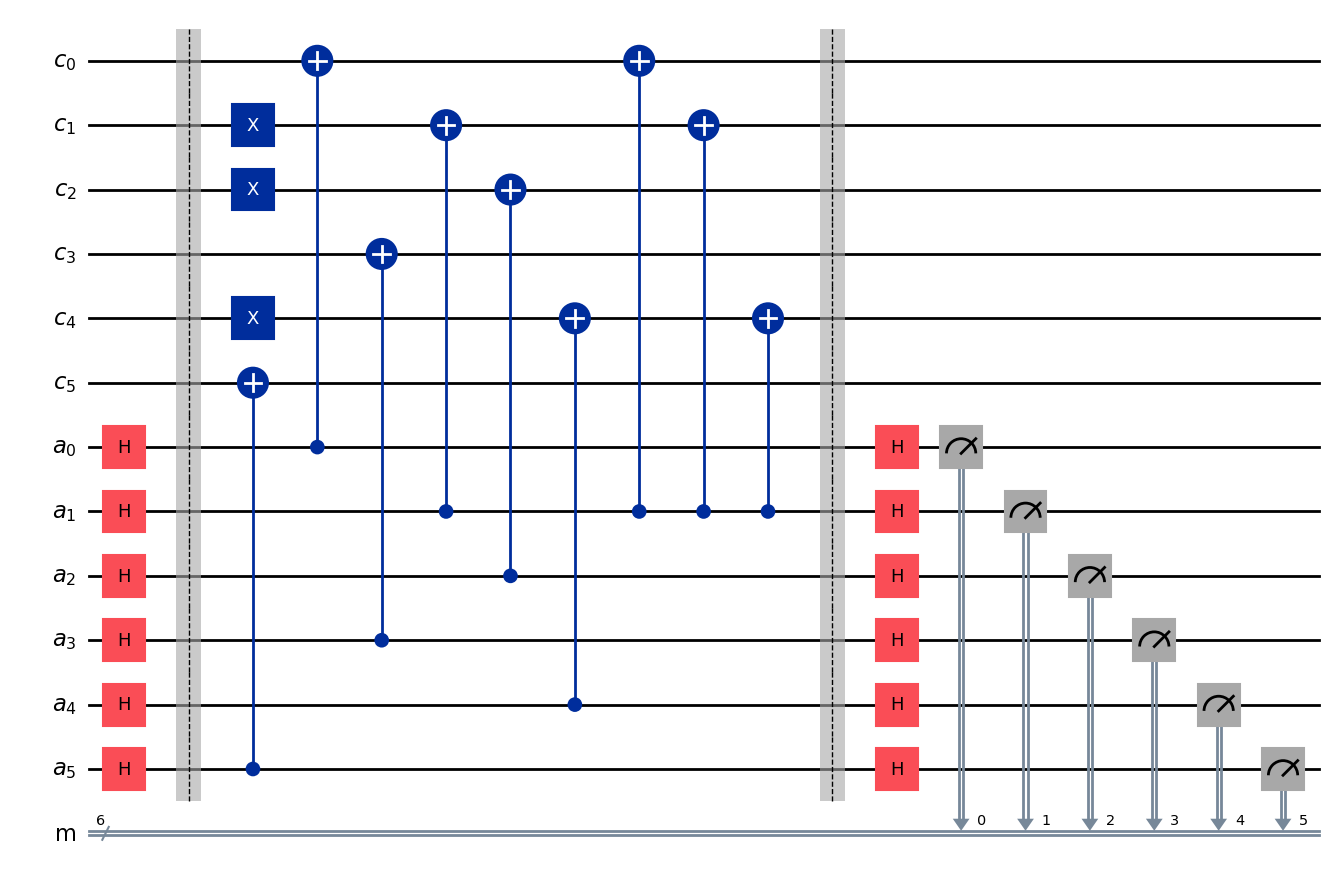

In [ ]:
# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 6
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rm = ClassicalRegister(n,'m')
qc = QuantumCircuit(rc, ra, rm)

# 사이먼 오라클 회로를 양자 회로로 구현
qc.h(ra)
qc.barrier()
oracle = simon_oracle_x(rc,ra,n)
qc.compose(oracle,range(2*n),inplace=True)
qc.barrier()
qc.h(ra)
qc.measure(ra,rm)
qc.draw(output='mpl', fold=-1)

In [ ]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10)
result = job.result()
count = result[0].data.m.get_counts()
print(count)


{'001000': 2, '011001': 1, '111101': 1, '101000': 2, '111010': 2, '110101': 1, '100111': 1}
